# WQ_ML_GROUP_3 - G

## Submission 2: Feature Selection and Engineering

Group Member:

1. Ugochukwu Nnalue
2. Aliaksandr Panko
3. Ntui Gideon Ateke
4. Oliseamaka Olise
5. Olawale Dosunmu

### Tasks:

1 Select at least four explanatory variables and perform the necessary transformations so that they are useful in the model phase. You are encouraged to use more than four variables. Investigate feature engineering techniques such as PCA and encoding target variables using one-hot encoding.

2 Write a short paragraph about each technique investigated and show an implementation of it in a Jupyter Notebook. Make sure to include references that indicate where the ideas were sourced.

3 At this stage groups should take the opportunity to familiarize themselves with the cross-validation techniques for forecasting financial time series – for example, traditional k-fold cross-validation versus walk forward analysis, and Purged K-Fold CV. Write a short paragraph explaining each technique researched. Research at least three (they don’t have to be the 3 mentioned here).

## 1. Explanatory variables selection and transformations 

In this section we need to execute the next steps:
1. Download data
2. Select the first factor - Volume
3. Select the second factor - Price Moving Average Convergence Divergence - MACD 12 days
4. Select the third factor - Price Moving Average Convergence Divergence - MACD 26 days
5. Select the fourth factor - Market index (Nasdaq Composite) value

The idea of Moving Average Convergence Divergence (MACD) is described [[here]](https://www.investopedia.com/terms/m/macd.asp) 

### 1.1 Data Download

For this submission we chose Google stock data for last 10 years.

In [1]:
# Import libraries
import pandas as pd
from pandas_datareader import data as pdr
import datetime
from sklearn.decomposition import PCA
from matplotlib import pylab as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Download Google stock daily data 
def download_hist_data(ticker, num_of_years):
    # Determine the first and the last days of the period
    end_date = datetime.date.today()
    start_date = datetime.date(end_date.year - num_of_years,
                               end_date.month, end_date.day)

    # Download data from Yahoo Finance
    try:
        return pdr.get_data_yahoo(ticker,
                                  start=start_date,
                                  end=end_date)
    except RemoteDataError:
        # handle error
        print ('Stock symbol "{}" is not valid'.format(ticker))
        return 1
       
google_symbol = 'GOOGL'
num_of_years = 10
stock_data = download_hist_data(google_symbol, num_of_years)

### 1.2 Daily volume 

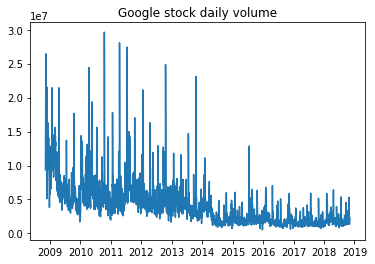

In [3]:
volume = stock_data ['Volume']
volume = volume[1:]
plt.plot(volume)
plt.title('Google stock daily volume')
plt.show()

### 1.3 MACD 12 days

In [4]:
number_of_days = 12
macd_12 = stock_data['Adj Close'].rolling(window=number_of_days).mean()

### 1.4 MACD 26 days

In [5]:
number_of_days = 26
macd_26 = stock_data['Adj Close'].rolling(window=number_of_days).mean()

### 1.5 Nasdaq Composite

In [6]:
nasdaq_symbol = '^IXIC'
nasdaq_data = download_hist_data(nasdaq_symbol, num_of_years)\

In [7]:
# Final Factors Data Frame
factors = pd.DataFrame()
factors['Volume'] = volume
factors['MACD_12'] = macd_12
factors['MACD_26'] = macd_26
factors['Nasdaq'] = nasdaq_data["Adj Close"]
factors.dropna(inplace = True)
factors.head()

,Volume,MACD_12,MACD_26,Nasdaq
Date,,,,
2008-12-12,11432700,145.845428,147.102678,1540.719971
2008-12-15,13462300,146.620370,146.707091,1508.339966
2008-12-16,14105000,147.968384,146.594285,1589.890015
2008-12-17,11567800,150.022521,146.526140,1579.310059
2008-12-18,9517400,151.489404,146.503425,1552.369995


## 2. PCA and one-hot encoding

**Principal component analysis (PCA)** is an unsupervised learning technique used in dimensionality reduction. It is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. If there are n observations with p variables, then the number of distinct principal components is min(n-1,p). This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors (each being a linear combination of the variables and containing n observations) are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables. [[wikipedia]](https://en.wikipedia.org/wiki/Principal_component_analysis)

To Apply PCA we need to normalized factors first. Initially, we tried to use 3 principal components, but the results showed us that the third is not required, since it does not give us additional information. So, to reduce dimension we used only 2 principal components.

In [8]:
factors_normalized=(factors-factors.mean())/factors.std()
factors_normalized.head()

,Volume,MACD_12,MACD_26,Nasdaq
Date,,,,
2008-12-12,2.455773,-1.361783,-1.352883,-1.490422
2008-12-15,3.125328,-1.359129,-1.354242,-1.509436
2008-12-16,3.337352,-1.354513,-1.354630,-1.461549
2008-12-17,2.500341,-1.347478,-1.354864,-1.467762
2008-12-18,1.823924,-1.342454,-1.354942,-1.483581


[0.85675253 0.13741261]


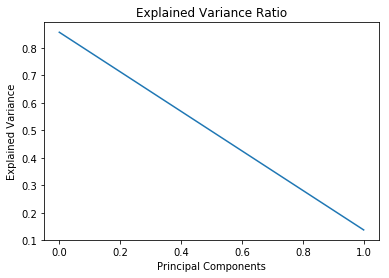

In [9]:
# PCA with 2 principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(factors_normalized)
print(pca.explained_variance_ratio_)

# Plot
plt.plot(range(0, 2), pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio')
plt.show()

In our case 85.7% of variance is explained by the first principal component, 13.7% of variance is explained by the second principal component. The chart shows variance explained by every principal component. In total, more than 99% of variance is explained by 2 principal components.

**One-hot encoding** is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. 

Categorical data are variables that contain label values rather than numeric values. The number of possible values is often limited to a fixed set.

Some examples include:

- A “pet” variable with the values: “dog” and “cat“.
- A “colour” variable with the values: “red“, “green” and “blue“.
- A “place” variable with the values: “first”, “second” and “third“.

Some algorithms can work with categorical data directly. For example, a decision tree can be learned directly from categorical data with no data transform required (this depends on the specific implementation).

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric. In general, this is mostly a constraint of the efficient implementation of machine learning algorithms rather than hard limitations on the algorithms themselves.

This means that categorical data must be converted to a numerical form. One of the ways to do it is **one-hot encoding**.

One-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value. [[data source]](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)

In the “colour” variable example, there are 3 categories and therefore 3 binary variables are needed. A “1” value is placed in the binary variable for the colour and “0” values for the other colours. 

For example:

Red: (1, 0, 0)

Green: (0, 1, 0)

Blue: (0, 0, 1)  

Since all our factors are numerical we introduced new categorical variable "Deviation". It has 2 values: "Above", "Below". Every time when the price deviates above Moving Average Convergence Divergence - MACD 26 days  it has values "Above" otherwise "Below" value is assigned.

In [10]:
# Create a new categorical variable Volume Level
factors['Price'] = stock_data["Adj Close"]
factors['Deviation'] = ""

factors['Deviation'].loc[factors['Price'] > factors['MACD_26']] = 'Above'
factors['Deviation'].loc[factors['Price'] <= factors['MACD_26']] = 'Below'

factors.head()

,Volume,MACD_12,MACD_26,Nasdaq,Price,Deviation
Date,,,,,,
2008-12-12,11432700,145.845428,147.102678,1540.719971,158.038040,Above
2008-12-15,13462300,146.620370,146.707091,1508.339966,155.490494,Above
2008-12-16,14105000,147.968384,146.594285,1589.890015,162.802795,Above
2008-12-17,11567800,150.022521,146.526140,1579.310059,157.777771,Above
2008-12-18,9517400,151.489404,146.503425,1552.369995,155.295288,Above


One-hot encoding can be applied only to integer representation. So we converted labels to integers.

In [11]:
# Convert labels to integers
le = LabelEncoder()
deviation_int = le.fit_transform(factors['Deviation'])
deviation_int = deviation_int.reshape(-1, 1)
factors['Deviation Int'] = deviation_int
factors.head()

,Volume,MACD_12,MACD_26,Nasdaq,Price,Deviation,Deviation Int
Date,,,,,,,
2008-12-12,11432700,145.845428,147.102678,1540.719971,158.038040,Above,0
2008-12-15,13462300,146.620370,146.707091,1508.339966,155.490494,Above,0
2008-12-16,14105000,147.968384,146.594285,1589.890015,162.802795,Above,0
2008-12-17,11567800,150.022521,146.526140,1579.310059,157.777771,Above,0
2008-12-18,9517400,151.489404,146.503425,1552.369995,155.295288,Above,0


Applied one-hot encoding to our new categorical variable in integer representation we had next result

In [12]:
ohe = OneHotEncoder(sparse=False)
encoded_columns = ohe.fit_transform(deviation_int)
factors['Above'] = encoded_columns[:,0]
factors['Below'] = encoded_columns[:,1]
factors.head()

,Volume,MACD_12,MACD_26,Nasdaq,Price,Deviation,Deviation Int,Above,Below
Date,,,,,,,,,
2008-12-12,11432700,145.845428,147.102678,1540.719971,158.038040,Above,0,1.0,0.0
2008-12-15,13462300,146.620370,146.707091,1508.339966,155.490494,Above,0,1.0,0.0
2008-12-16,14105000,147.968384,146.594285,1589.890015,162.802795,Above,0,1.0,0.0
2008-12-17,11567800,150.022521,146.526140,1579.310059,157.777771,Above,0,1.0,0.0
2008-12-18,9517400,151.489404,146.503425,1552.369995,155.295288,Above,0,1.0,0.0


## 3. Cross-validation techniques for forecasting financial time series.

**Cross-validation** is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. In a prediction problem, a model is usually given a dataset of known data on which training is run (training dataset), and a dataset of unknown data (or first seen data) against which the model is tested (called the validation dataset or testing set). The goal of cross-validation is to test the model’s ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

In **k-fold cross-validation**, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the test sample while the remaining k-1 samples are used to train the model. The cross-validation process is then repeated k times (the number of folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. [[wikipedia]](https://en.wikipedia.org/wiki/Cross-validation_(statistics))

**Advantages**:
- Computation time is reduced as we repeated the process only 10 times when the value of k is 10.
- Reduced bias
- Every data points get to be tested exactly once and is used in training k-1 times
- The variance of the resulting estimate is reduced as k increases

**Disadvantages**
- The training algorithm is computationally intensive as the algorithm has to be rerun from scratch k times.
- Problems with time series data

Two **problems** arise when applying k-fold cross-validation to time series data:

- Time series data is time-ordered. In real world applications, we use past observations to predict future observations. The randomization in the standard cross-validation algorithm does not preserve the time ordering, and we end up making predictions for some samples using a model trained on posterior samples.

- The time series data is often strongly correlated along the time axis. The randomization will make it likely that for each sample in the validation set, numerous strongly correlated samples exist in the train set. This defeats the very purpose of having a validation set: the model essentially “knows” about the validation set already, leading to inflated performance metrics on the validation set in case of overfitting.

Clearly, the main source of these problems is the randomization. However, if we simply drop the randomization and arrange for the validation set samples to be posterior to all the training set samples, then for a given validation set size, there is only a single possible train/validation split.

**Walk-forward cross-validation** solves this problem by restricting the full sample set differently for each split. We first split our dataset into k equal blocks of contiguous samples and decide that the train set will always consist of p contiguous blocks. The splits are then as follows

1. Train set: blocks 1 to p, validation set: block p+1
2. Train set: blocks 2 to p+1, validation set: block p+2
3. …

In this way, by “walking forward” in the full sample set, one can construct k-p splits. This is a big improvement over the classical cross-validation algorithms, but some problems remain.

- Near the split point, we may have training samples whose evaluation time is posterior to the prediction time of validation samples. Such overlapping samples are unlikely to be independent, leading to information leaking from the train set into the validation set.
- It is impossible to make k-p very large, leading to a large variance in the performance statistics.
- The most relevant part of the dataset, namely the most recent one, is also the one that is used least. This can be a problem for time series subject to regime changes over long periods of time, as it is often the case in financial time series.

**Purging**. The first problem is rather easily solved, through purging. Purging involves dropping from the train set any sample whose evaluation time is posterior to the earliest prediction time in the validation set. This ensures that predictions on the validation set are free of look-ahead bias. [[4]](https://medium.com/@samuel.monnier/cross-validation-tools-for-time-series-ffa1a5a09bf9) 

**Stratified cross-validation**
Stratification is a technique where we rearrange the data in a way that each fold has a good representation of the whole dataset. It forces each fold to have at least m instances of each class. This approach ensures that one class of data is not overrepresented especially when the target variable is unbalanced.

